# Analysis of Athens Regions

### 1. Import necessary libraries

In [1]:
# for dataframes and numerical operations
import pandas as pd
import numpy as np

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium 

# metrics for clustering 
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates

# scaler
from sklearn.preprocessing import MinMaxScaler

# PCA
from sklearn.decomposition import PCA

### 2. Data gathering

The data gathering was very simple, as it was acquired directly from Wikipedia. The first paragraph in "Locations" has all the required regions and they were passed with "copy-paste" into the list "regions". It is then split appropriately and the "athens_regions" is constructed.

In [74]:
# get all the regions on Athens from "https://en.wikipedia.org/wiki/Athens"
regions = 'Omonoia, Syntagma, Exarcheia, Agios Nikolaos, Neapolis, Lykavittos, Lofos Strefi, Lofos Finopoulou, Lofos Filopappou, Pedion Areos, Metaxourgeio, Aghios Kostantinos, Larissa Station, Kerameikos, Psiri, Monastiraki, Gazi, Thission, Kapnikarea, Aghia Irini, Aerides, Anafiotika, Plaka, Acropolis, Pnyka, Makrygianni, Lofos Ardittou, Zappeion, Aghios Spyridon, Pangrati, Kolonaki, Dexameni, Evaggelismos, Gouva, Aghios Ioannis, Neos Kosmos, Koukaki, Kynosargous, Fix, Ano Petralona, Kato Petralona, Rouf, Votanikos, Profitis Daniil, Akadimia Platonos, Kolonos, Kolokynthou, Attikis Square, Lofos Skouze, Sepolia, Kypseli, Aghios Meletios, Nea Kypseli, Gyzi, Polygono, Ampelokipoi, Panormou-Gerokomeio, Pentagono, Ellinorosson, Nea Filothei, Ano Kypseli, Tourkovounia-Lofos Patatsou, Lofos Elikonos, Koliatsou, Thymarakia, Kato Patisia, Treis Gefyres, Aghios Eleftherios, Ano Patisia, Kypriadou, Menidi, Prompona, Aghios Panteleimonas, Pangrati, Goudi, Vyronas, Ilisia'

# split the "regions" correctly
athens_regions = regions.split(', ')

# show all regions
athens_regions

['Omonoia',
 'Syntagma',
 'Exarcheia',
 'Agios Nikolaos',
 'Neapolis',
 'Lykavittos',
 'Lofos Strefi',
 'Lofos Finopoulou',
 'Lofos Filopappou',
 'Pedion Areos',
 'Metaxourgeio',
 'Aghios Kostantinos',
 'Larissa Station',
 'Kerameikos',
 'Psiri',
 'Monastiraki',
 'Gazi',
 'Thission',
 'Kapnikarea',
 'Aghia Irini',
 'Aerides',
 'Anafiotika',
 'Plaka',
 'Acropolis',
 'Pnyka',
 'Makrygianni',
 'Lofos Ardittou',
 'Zappeion',
 'Aghios Spyridon',
 'Pangrati',
 'Kolonaki',
 'Dexameni',
 'Evaggelismos',
 'Gouva',
 'Aghios Ioannis',
 'Neos Kosmos',
 'Koukaki',
 'Kynosargous',
 'Fix',
 'Ano Petralona',
 'Kato Petralona',
 'Rouf',
 'Votanikos',
 'Profitis Daniil',
 'Akadimia Platonos',
 'Kolonos',
 'Kolokynthou',
 'Attikis Square',
 'Lofos Skouze',
 'Sepolia',
 'Kypseli',
 'Aghios Meletios',
 'Nea Kypseli',
 'Gyzi',
 'Polygono',
 'Ampelokipoi',
 'Panormou-Gerokomeio',
 'Pentagono',
 'Ellinorosson',
 'Nea Filothei',
 'Ano Kypseli',
 'Tourkovounia-Lofos Patatsou',
 'Lofos Elikonos',
 'Koliatsou',
 

In [81]:
# in order to get the coordinates, we will pass every region to "geopy", so we construct the following:

# for coordinates:
latitudes = []
longitudes = []

# unfortunately, "geopy" does not have coordinates for all regions (we will address this issue with "try-except", 
#  so we store them here:
regions_no_geodata = []

# these are the final regions, for which we finally have coordinates
final_athens_regions = []

# "geopy":
for i in range(len(athens_regions)):
    try:
        address = '{}, Athens'.format(athens_regions[i])
        geolocator = Nominatim(user_agent="athens")
        location = geolocator.geocode(address)
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
        final_athens_regions.append(athens_regions[i])
    except AttributeError:
        regions_no_geodata.append(athens_regions[i])

In [82]:
print('Regions not found with "geopy": ', regions_no_geodata)
print('\n')
print('Regions found with "geopy": ', final_athens_regions)

Regions not found with "geopy":  ['Neapolis', 'Lykavittos', 'Lofos Filopappou', 'Aghios Kostantinos', 'Thission', 'Aghia Irini', 'Aerides', 'Lofos Ardittou', 'Aghios Spyridon', 'Dexameni', 'Evaggelismos', 'Kynosargous', 'Votanikos', 'Profitis Daniil', 'Kolokynthou', 'Lofos Skouze', 'Aghios Meletios', 'Ampelokipoi', 'Ellinorosson', 'Ano Kypseli', 'Tourkovounia-Lofos Patatsou', 'Lofos Elikonos', 'Thymarakia', 'Aghios Eleftherios', 'Kypriadou']


Regions found with "geopy":  ['Omonoia', 'Syntagma', 'Exarcheia', 'Agios Nikolaos', 'Lofos Strefi', 'Lofos Finopoulou', 'Pedion Areos', 'Metaxourgeio', 'Larissa Station', 'Kerameikos', 'Psiri', 'Monastiraki', 'Gazi', 'Kapnikarea', 'Anafiotika', 'Plaka', 'Acropolis', 'Pnyka', 'Makrygianni', 'Zappeion', 'Pangrati', 'Kolonaki', 'Gouva', 'Aghios Ioannis', 'Neos Kosmos', 'Koukaki', 'Fix', 'Ano Petralona', 'Kato Petralona', 'Rouf', 'Akadimia Platonos', 'Kolonos', 'Attikis Square', 'Sepolia', 'Kypseli', 'Nea Kypseli', 'Gyzi', 'Polygono', 'Panormou-Gerok

In [83]:
print('In total, we will work with {} regions in Athens.'.format(len(final_athens_regions)))

In total, we will work with 52 regions in Athens.


In [7]:
# transform into a dataframe by combining regions with their coordinates
athens_df = pd.DataFrame(data={'Region':final_athens_regions, 'Latitude':latitudes, 'Longitude':longitudes})
athens_df

Region   Latitude  Longitude
0                Omonoia  37.984183  23.728302
1               Syntagma  37.975503  23.735743
2              Exarcheia  37.986653  23.734839
3         Agios Nikolaos  38.006988  23.727705
4           Lofos Strefi  37.988187  23.738972
5       Lofos Finopoulou  37.992235  23.741949
6           Pedion Areos  37.993771  23.738002
7           Metaxourgeio  37.983150  23.718824
8        Larissa Station  37.992282  23.720720
9             Kerameikos  37.978634  23.718221
10                 Psiri  37.978690  23.724673
11           Monastiraki  37.976431  23.725905
12                  Gazi  37.974813  23.702751
13            Kapnikarea  37.976407  23.728631
14            Anafiotika  37.972332  23.728258
15                 Plaka  37.972850  23.730056
16             Acropolis  37.971722  23.726383
17                 Pnyka  37.969546  23.718780
18           Makrygianni  37.968722  23.729595
19              Zappeion  37.971517  23.736296
20              Pangrati  37.969882  23.746599
21              Kolonaki  37.976975  23.740814
22                 Gouva  37.931614  23.769738
23        Aghios Ioannis  37.972006  23.674784
24           Neos Kosmos  37.957670  23.728372
25               Koukaki  37.963456  23.722023
26                   Fix  37.964569  23.727287
27         Ano Petralona  37.970467  23.712938
28        Kato Petralona  37.971826  23.708129
29                  Rouf  37.978348  23.712152
30     Akadimia Platonos  37.989357  23.711217
31               Kolonos  37.996069  23.716221
32        Attikis Square  38.032862  23.823198
33               Sepolia  38.005879  23.712289
34               Kypseli  38.002812  23.742269
35           Nea Kypseli  38.000403  23.746963
36                  Gyzi  37.990711  23.746139
37              Polygono  37.997429  23.752672
38   Panormou-Gerokomeio  37.993212  23.763577
39             Pentagono  38.001299  23.782422
40          Nea Filothei  38.022135  23.784871
41             Koliatsou  38.009627  23.734397
42          Kato Patisia  38.011783  23.728601
43         Treis Gefyres  38.014068  23.718466
44           Ano Patisia  38.023852  23.736009
45                Menidi  38.064770  23.740390
46              Prompona  38.030609  23.739242
47  Aghios Panteleimonas  37.996158  23.725349
48              Pangrati  37.969882  23.746599
49                 Goudi  37.988821  23.776865
50               Vyronas  37.956457  23.755481
51                Ilisia  37.975425  23.754530

### 3. See Athens regions on the map 

In [8]:
# we will get coordinates for Athens and, then, see all of its regions on the map, with the help of "folium"
address = 'Athens'
geolocator = Nominatim(user_agent="athens")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Athens are Latitude: {} and Longitude: {}.'.format(latitude, longitude))

# create map of Athens using latitude and longitude values
athens_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, region in zip(athens_df['Latitude'], athens_df['Longitude'], athens_df['Region']):
    label = '{}'.format(region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(athens_map)  
    
athens_map

The geograpical coordinates of Athens are Latitude: 37.9839412 and Longitude: 23.7283052.


**In case it is isn't displayed correctly by "folium": **

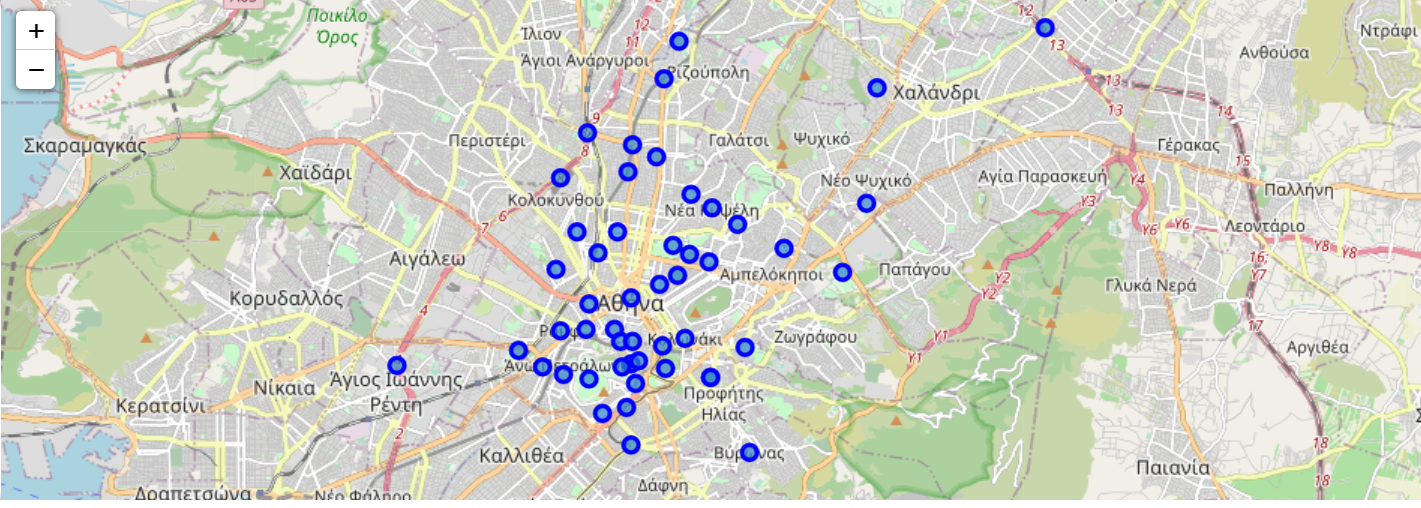

In [87]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename=r"C:\Users\kalyv\Desktop\athens.PNG")

So, we can clearly see all regions of Athens, displayed as blue dots on the map. 

### 4. Foursquare data

In [11]:
# we pass the credentials in order to acquire location data from Foursquare

CLIENT_ID = '..' # Foursquare ID
CLIENT_SECRET = '..' # Foursquare Secret
ACCESS_TOKEN = '..' # FourSquare Access Token
VERSION = '20180604'

venues_list=[]
for name, lat, lng in zip(final_athens_regions, latitudes, longitudes):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, 3000, 200)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    venues_list.extend([
        [name, v['venue']['name'], v['venue']['id'],
         v['venue']['location']['lat'],
         v['venue']['location']['lng'],  
         v['venue']['categories'][0]['name']
        ] for v in results])
    nearby_venues = pd.DataFrame(venues_list)
    nearby_venues.columns = ['Region', 'Venue', 'Venue ID',
                             'Venue Latitude', 'Venue Longitude',
                             'Venue Primary Category']

In [14]:
# let's see the venues in every region
nearby_venues

Region                                              Venue  \
0     Omonoia         National Theatre of Greece (Εθνικό Θέατρο)   
1     Omonoia                                Στάνη Γαλακτοπωλείο   
2     Omonoia                                              Τράτα   
3     Omonoia                                         Taf Coffee   
4     Omonoia                             Mr Bean Coffee Brewers   
...       ...                                                ...   
5195   Ilisia               Gardenias Square (Πλατεία Γαρδένιας)   
5196   Ilisia                                          Le Greche   
5197   Ilisia                                       Cross Garage   
5198   Ilisia                                    Ελληνίς Cinemax   
5199   Ilisia  Athens Lawn Tennis Club (Όμιλος Αντισφαιρίσεως...   

                      Venue ID  Venue Latitude  Venue Longitude  \
0     4e822369f5b91d2e46d16f27       37.984742        23.725541   
1     4c038ca13f03b713b6fb5141       37.985463        23.727908   
2     4df4a6d218a88611c6c0c27e       37.984219        23.730939   
3     4b64103df964a520759d2ae3       37.983451        23.730853   
4     56ed54a1498e1bc48d70301d       37.983610        23.731250   
...                        ...             ...              ...   
5195  4ca744c0d971b1f7f21908e1       37.977457        23.772848   
5196  53b83bb5498ed9a71ea9b46e       37.975251        23.732615   
5197  52dd3f6f11d2d5132e84fbc6       37.986960        23.765450   
5198  4ec7d87b754a92231fdfdaa6       37.988269        23.762460   
5199  4cb5d80a9c7ba35d70648d06       37.969240        23.735046   

     Venue Primary Category  
0                   Theater  
1              Dessert Shop  
2              Fish Taverna  
3               Coffee Shop  
4               Coffee Shop  
...                     ...  
5195                  Plaza  
5196         Ice Cream Shop  
5197   Gym / Fitness Center  
5198          Movie Theater  
5199           Tennis Court  

[5200 rows x 6 columns]

In [18]:
# now, let's see the 20 most popular types of venues
nearby_venues['Venue Primary Category'].value_counts().head(20)

Café                  508
Bar                   359
Coffee Shop           354
Dessert Shop          247
Historic Site         241
Meze Restaurant       167
Greek Restaurant      167
Cocktail Bar          166
Souvlaki Shop         119
Ice Cream Shop        108
Hotel                 103
Park                   91
Theater                86
Plaza                  85
Falafel Restaurant     83
Bakery                 70
Gym                    68
Movie Theater          66
Pizza Place            65
Kafenio                65
Name: Venue Primary Category, dtype: int64

#### Now, we will decide on a few steps.
1. We will select the 20 most popular types of venues, so as to perform a representative analysis.
2. We are not interested in Gyms (not a tourist attraction).
3. we will combine "cafe" and "coffee shops" into one category.
4. We will combine "Meze Restaurant" and "Greek Restaurant" into one category (as "meze" refers to traditional greek food). 

In [19]:
# construct "venues"
venues = [i for i in nearby_venues['Venue Primary Category'].value_counts().head(20).index]

In [ ]:
# delete "Gym"
del(venues[venues.index('Gym')])

In [24]:
# select only rows with specific venues according to "venues" 
specific_nearby_venues = nearby_venues[nearby_venues['Venue Primary Category'].isin(venues)]

# reset the index of the dataframe, as we selected rows
specific_nearby_venues.reset_index(drop=True, inplace=True)
specific_nearby_venues

Region                                       Venue  \
0     Omonoia  National Theatre of Greece (Εθνικό Θέατρο)   
1     Omonoia                         Στάνη Γαλακτοπωλείο   
2     Omonoia                                  Taf Coffee   
3     Omonoia                      Mr Bean Coffee Brewers   
4     Omonoia                        Της Θεάτρου Το Στέκι   
...       ...                                         ...   
3145   Ilisia                                      Galaxy   
3146   Ilisia                                        Kaya   
3147   Ilisia        Gardenias Square (Πλατεία Γαρδένιας)   
3148   Ilisia                                   Le Greche   
3149   Ilisia                             Ελληνίς Cinemax   

                      Venue ID  Venue Latitude  Venue Longitude  \
0     4e822369f5b91d2e46d16f27       37.984742        23.725541   
1     4c038ca13f03b713b6fb5141       37.985463        23.727908   
2     4b64103df964a520759d2ae3       37.983451        23.730853   
3     56ed54a1498e1bc48d70301d       37.983610        23.731250   
4     55156e65498eb8bdba7fd799       37.980703        23.725394   
...                        ...             ...              ...   
3145  4ca0e59a2fb1a143bc7c0041       37.977812        23.733574   
3146  51f25134498ea592618fa2d9       37.976884        23.733337   
3147  4ca744c0d971b1f7f21908e1       37.977457        23.772848   
3148  53b83bb5498ed9a71ea9b46e       37.975251        23.732615   
3149  4ec7d87b754a92231fdfdaa6       37.988269        23.762460   

     Venue Primary Category  
0                   Theater  
1              Dessert Shop  
2               Coffee Shop  
3               Coffee Shop  
4                   Kafenio  
...                     ...  
3145                    Bar  
3146            Coffee Shop  
3147                  Plaza  
3148         Ice Cream Shop  
3149          Movie Theater  

[3150 rows x 6 columns]

In [ ]:
# convert "Coffee Shop" to "Cafe" and "Meze Restaurant" to "Greek Restaurant"
specific_nearby_venues['Venue Primary Category'] = np.where(specific_nearby_venues['Venue Primary Category']=='Coffee Shop', 'Café',
                                                           np.where(specific_nearby_venues['Venue Primary Category']=='Meze Restaurant','Greek Restaurant', specific_nearby_venues['Venue Primary Category']))

In [28]:
# let's see the final venue types (17 venues in total)
specific_nearby_venues['Venue Primary Category'].value_counts()

Café                  862
Bar                   359
Greek Restaurant      334
Dessert Shop          247
Historic Site         241
Cocktail Bar          166
Souvlaki Shop         119
Ice Cream Shop        108
Hotel                 103
Park                   91
Theater                86
Plaza                  85
Falafel Restaurant     83
Bakery                 70
Movie Theater          66
Pizza Place            65
Kafenio                65
Name: Venue Primary Category, dtype: int64

### 5. Region Analysis

We will perform one hot encoding in order to transform the venue category of every row into features of 0s and 1s. This is a necessary part when having categorical features.

In [29]:
# one hot encoding
athens_onehot = pd.get_dummies(specific_nearby_venues[['Venue Primary Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
athens_onehot['Region'] = specific_nearby_venues['Region'] 

# move region column as the first column
fixed_columns = [athens_onehot.columns[-1]] + list(athens_onehot.columns[:-1])
athens_onehot = athens_onehot[fixed_columns]

athens_onehot.head()

Region  Bakery  Bar  Café  Cocktail Bar  Dessert Shop  Falafel Restaurant  \
0  Omonoia       0    0     0             0             0                   0   
1  Omonoia       0    0     0             0             1                   0   
2  Omonoia       0    0     1             0             0                   0   
3  Omonoia       0    0     1             0             0                   0   
4  Omonoia       0    0     0             0             0                   0   

   Greek Restaurant  Historic Site  Hotel  Ice Cream Shop  Kafenio  \
0                 0              0      0               0        0   
1                 0              0      0               0        0   
2                 0              0      0               0        0   
3                 0              0      0               0        0   
4                 0              0      0               0        1   

   Movie Theater  Park  Pizza Place  Plaza  Souvlaki Shop  Theater  
0              0     0            0      0              0        1  
1              0     0            0      0              0        0  
2              0     0            0      0              0        0  
3              0     0            0      0              0        0  
4              0     0            0      0              0        0

We see that we have multiple rows per region (equal to the number of venues in this region). So, for clustering, we have to group the data so as to have one row per region and compare their venues to find how similar they are.

In [30]:
# we can see how any venues of every type we have in every region
athens_grouped = athens_onehot.groupby('Region').sum().reset_index()
athens_grouped

Region  Bakery  Bar  Café  Cocktail Bar  Dessert Shop  \
0              Acropolis       0    9    16             3             3   
1         Aghios Ioannis       4    4    17             4             3   
2   Aghios Panteleimonas       0   10    15             6             8   
3         Agios Nikolaos       0    4    17             1             8   
4      Akadimia Platonos       0    9    13             5             7   
5             Anafiotika       0    9    17             3             3   
6            Ano Patisia       1    5    17             2             6   
7          Ano Petralona       1    9    13             3             2   
8         Attikis Square       9    4    10             2            12   
9              Exarcheia       0   10    24             4             5   
10                   Fix       0    9    17             1             3   
11                  Gazi       1    8    14             3             2   
12                 Goudi       5    3    13             1             6   
13                 Gouva       7    6    13             0             4   
14                  Gyzi       2    5    23             2             4   
15                Ilisia       4    5    20             3             2   
16            Kapnikarea       0    9    19             4             3   
17          Kato Patisia       0    5    17             2             7   
18        Kato Petralona       2    8    16             3             2   
19            Kerameikos       0    8    13             7             3   
20             Koliatsou       0    5    18             1             6   
21              Kolonaki       0    7    22             3             4   
22               Kolonos       0    9    11             3             8   
23               Koukaki       0    8    14             1             3   
24               Kypseli       1    5    15             2             8   
25       Larissa Station       0   11    12             6             8   
26      Lofos Finopoulou       1    5    24             3             5   
27          Lofos Strefi       1    9    23             4             5   
28           Makrygianni       0    8    16             3             3   
29                Menidi       5    0    18             1             2   
30          Metaxourgeio       0    9    12             8             4   
31           Monastiraki       0    9    17             4             3   
32          Nea Filothei       3    5    14             4             4   
33           Nea Kypseli       1    7    15             2             8   
34           Neos Kosmos       1    6    16             3             3   
35               Omonoia       0    8    20             5             6   
36              Pangrati       2   12    46             4             6   
37   Panormou-Gerokomeio       5    6    14             3             6   
38          Pedion Areos       1    9    22             5             6   
39             Pentagono       3    1     9             6             6   
40                 Plaka       0   10    18             4             3   
41                 Pnyka       0    8    15             3             2   
42              Polygono       4    6    14             2             7   
43              Prompona       1    6    13             2             7   
44                 Psiri       0    9    15             5             4   
45                  Rouf       0    9    12             7             4   
46               Sepolia       2    6    12             0             5   
47              Syntagma       0    8    24             4             4   
48         Treis Gefyres       2    5    19             1             7   
49               Vyronas       1    7    14             4             3   
50              Zappeion       0    7    24             4             4   

    Falafel Restaurant  Greek Restaurant  Historic Site  Hotel  \
0                    2                 4           

In [35]:
# sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
# in this step, we construct a dataframe to see the 10 most popular venues for every region (not necessary step for clustering)

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Region']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Region'] = athens_grouped['Region']

for ind in np.arange(athens_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(athens_grouped.iloc[ind, :], num_top_venues)

venues_sorted

Region 1st Most Common Venue 2nd Most Common Venue  \
0              Acropolis                  Café         Historic Site   
1         Aghios Ioannis                  Café      Greek Restaurant   
2   Aghios Panteleimonas                  Café                   Bar   
3         Agios Nikolaos                  Café      Greek Restaurant   
4      Akadimia Platonos                  Café                   Bar   
5             Anafiotika                  Café         Historic Site   
6            Ano Patisia                  Café      Greek Restaurant   
7          Ano Petralona                  Café         Historic Site   
8         Attikis Square          Dessert Shop                  Café   
9              Exarcheia                  Café                   Bar   
10                   Fix                  Café         Historic Site   
11                  Gazi                  Café      Greek Restaurant   
12                 Goudi                  Café          Dessert Shop   
13                 Gouva                  Café                Bakery   
14                  Gyzi                  Café                   Bar   
15                Ilisia                  Café                   Bar   
16            Kapnikarea                  Café         Historic Site   
17          Kato Patisia                  Café      Greek Restaurant   
18        Kato Petralona                  Café         Historic Site   
19            Kerameikos                  Café         Historic Site   
20             Koliatsou                  Café      Greek Restaurant   
21              Kolonaki                  Café                   Bar   
22               Kolonos      Greek Restaurant                  Café   
23               Koukaki                  Café         Historic Site   
24               Kypseli                  Café      Greek Restaurant   
25       Larissa Station                  Café                   Bar   
26      Lofos Finopoulou                  Café                   Bar   
27          Lofos Strefi                  Café                   Bar   
28           Makrygianni                  Café         Historic Site   
29                Menidi                  Café      Greek Restaurant   
30          Metaxourgeio                  Café         Historic Site   
31           Monastiraki                  Café         Historic Site   
32          Nea Filothei                  Café                   Bar   
33           Nea Kypseli                  Café          Dessert Shop   
34           Neos Kosmos                  Café         Historic Site   
35               Omonoia                  Café                   Bar   
36              Pangrati                  Café                   Bar   
37   Panormou-Gerokomeio                  Café          Dessert Shop   
38          Pedion Areos                  Café                   Bar   
39             Pentagono                  Café                  Park   
40                 Plaka                  Café         Historic Site   
41                 Pnyka                  Café         Historic Site   
42              Polygono                  Café      Greek Restaurant   
43              Prompona                  Café      Greek Restaurant   
44                 Psiri                  Café         Historic Site   
45                  Rouf                  Café         Historic Site   
46               Sepolia                  Café      Greek Restaurant   
47              Syntagma                  Café                   Bar   
48         Treis Gefyres                  Café      Greek Restaurant   
49               Vyronas                  Café      Greek Restaurant   
50              Zappeion                  Café         Historic Site   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                    Bar                 Hotel        Ice Cream Shop   
1                 Bakery                   Bar          Cocktail Bar   
2       Greek Restaurant          Dessert Shop          C

### 6. Clustering

In [38]:
# we first have to scale the data, because clustering is based on distances
# that means that very popular venues might "dominate" the less popular ones and the results would not be realistic

athens_grouped_clustering = athens_grouped.drop('Region', 1)
athens_grouped_clustering_scaled = MinMaxScaler().fit_transform(athens_grouped_clustering.values)
athens_grouped_clustering_scaled

array([[0.        , 0.75      , 0.18918919, 0.375     , 0.1       ,
        0.66666667, 0.18181818, 1.        , 0.5       , 1.        ,
        0.25      , 0.33333333, 0.125     , 0.5       , 0.5       ,
        0.        , 0.2       ],
       [0.44444444, 0.33333333, 0.21621622, 0.5       , 0.1       ,
        0.        , 0.54545455, 0.        , 0.        , 0.25      ,
        0.        , 0.33333333, 0.125     , 0.5       , 0.25      ,
        0.28571429, 0.2       ],
       [0.        , 0.83333333, 0.16216216, 0.75      , 0.6       ,
        1.        , 0.63636364, 0.08333333, 0.1       , 0.        ,
        1.        , 0.        , 0.125     , 0.25      , 0.        ,
        0.28571429, 1.        ],
       [0.        , 0.33333333, 0.21621622, 0.125     , 0.6       ,
        0.33333333, 0.63636364, 0.        , 0.        , 0.25      ,
        0.5       , 0.66666667, 0.        , 0.        , 0.25      ,
        0.71428571, 0.8       ],
       [0.        , 0.75      , 0.10810811, 0.625   

Clustering is an Unsupervised Learning Algorithm and that means it is not based on labeled data and we also do not know the appropriate number of clusters that would give the best performance. 

So, we will try to find the best number of clusters based on inertia (a measure of how internally coherent clusters are) and the "elbow method".

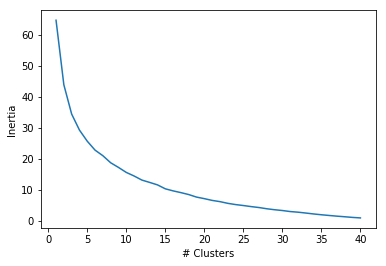

In [40]:
# set the meximum number of clusters to 41, perform clustering with "for" loop to try all possible number of clusters,
#  compute the inertia and store the results 
number_clusters = 41
kmeans_tests = [KMeans(n_clusters=cluster, init='k-means++', n_init=10, random_state=0) for cluster in range(1, number_clusters)]
scores = [kmeans_tests[test].fit(athens_grouped_clustering_scaled).inertia_ for test in range(len(kmeans_tests))]

plt.plot(range(1, number_clusters), scores)
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.show()

According to the "elbow method", we can set the appropriate number of clusters between 4 and 10 because, as the number of clusters increases there is no significant decrease of inertia (i.e. increase of performance), so there is no point working with more clusters.

However, for simplicity reasons, let's set the number of clusters to 4.

In [44]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(athens_grouped_clustering_scaled)
clusters = kmeans.predict(athens_grouped_clustering_scaled)  # same as "clusters = kmeans.labels_"

The dataset has many features (i.e. every region has multiple venues) and it is not easy to plot the data.

For this reason, we introduce PCA (Principal Component Analysis), another Unsupervised Leaning Algorithm, which decreases the number of features in such a way that new features are constructed in order to keep as much explainability as possible. In this way, we can also view the data in two dimensions.

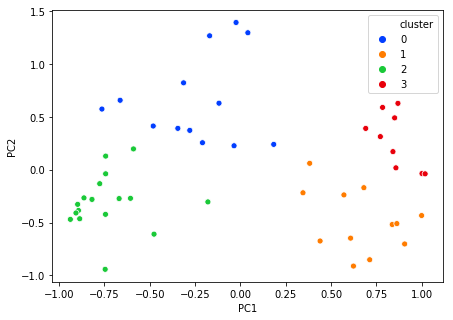

In [93]:
# we specify 2 principal components (as new features) to keep the model simple and, also, view the results in 2D
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(athens_grouped_clustering_scaled)

# construct a dataframe with PC1, PC2 and the correct cluster for every region
reduced_df = pd.DataFrame(data_reduced, columns=['PC1','PC2'])
reduced_df['cluster'] = clusters

# plot the clusters
fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='cluster', palette='bright')

We see that 4 clusters are formed (as specified) and they are a bit distinct from each other.

In [94]:
# compute the variance ratio explained by PCA:
pca.explained_variance_ratio_

array([0.36809032, 0.23998701])

In total, the two new features explain about 61% of the initial variance in the data. It is fair enough, taking into consideration that we have 17 venues for every region.

Another metric for clustering is the Silhouette Score, which is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 (worst) to 1 (best), while a score of 0 indicates overlapping clusters.

In [47]:
# compute the silhouette score
silhouette_score(athens_grouped_clustering_scaled, clusters)

0.2677782885403751

### 7. Plots - Maps

For the final part of our analysis, we have to construct two new dataframes, in order to be able to plot the clusters and see them on the map.

In [ ]:
# first, define the same colors, in order to be aligned with the previous cluster plot
colors_d = {0:'#0529f7', 1:'#f7b205', 2:'#05f709', 3:'#ff0000'}

**1. Parallel Plots: plots that show the similarities (in terms of features) between regions of the same cluster.**

In [54]:
# let's remember the "athens_grouped" dataframe
athens_grouped.head()

Region  Bakery  Bar  Café  Cocktail Bar  Dessert Shop  \
0             Acropolis       0    9    16             3             3   
1        Aghios Ioannis       4    4    17             4             3   
2  Aghios Panteleimonas       0   10    15             6             8   
3        Agios Nikolaos       0    4    17             1             8   
4     Akadimia Platonos       0    9    13             5             7   

   Falafel Restaurant  Greek Restaurant  Historic Site  Hotel  Ice Cream Shop  \
0                   2                 4             12      5               4   
1                   0                 8              0      0               1   
2                   3                 9              1      1               0   
3                   1                 9              0      0               1   
4                   3                 8              6      1               2   

   Kafenio  Movie Theater  Park  Pizza Place  Plaza  Souvlaki Shop  Theater  
0        1              1     1            2      2              0        1  
1        0              1     1            2      1              2        1  
2        4              0     1            1      0              2        5  
3        2              2     0            0      1              5        4  
4        3              1     0            1      1              2        4

We should add the information about the cluster of every region as computed and then scale the data for the parallel plots to work properly.

In [55]:
# drop the region name
athens_grouped_scaled = pd.DataFrame(athens_grouped_clustering_scaled, columns=athens_grouped.drop(['Region'], axis=1).columns)

# add the cluster labels
athens_grouped_scaled['cluster'] = clusters

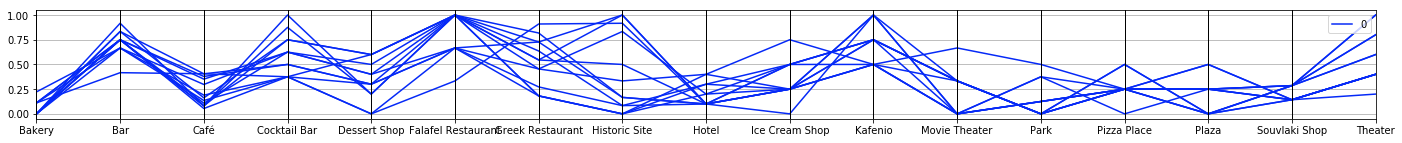

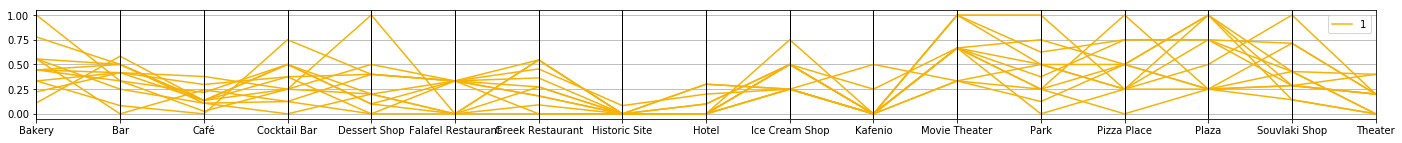

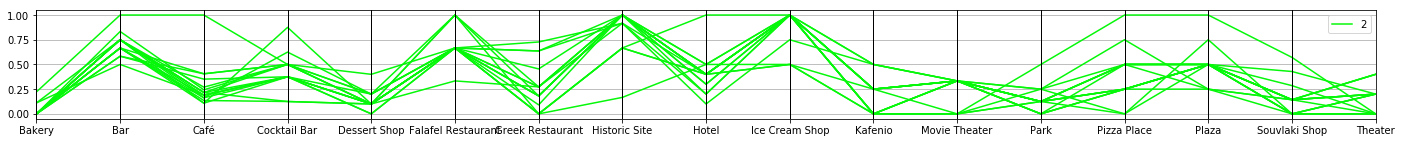

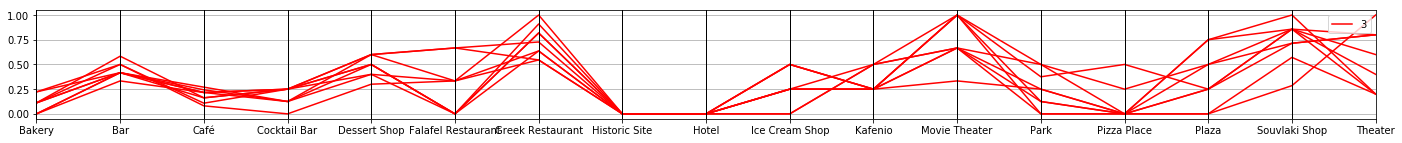

In [97]:
# define the parallel plots for every cluster
plt.figure(figsize=(24,2))
parallel_coordinates(athens_grouped_scaled[athens_grouped_scaled['cluster']==0], 'cluster', color=colors_d[0])
plt.figure(figsize=(24,2))
parallel_coordinates(athens_grouped_scaled[athens_grouped_scaled['cluster']==1], 'cluster', color=colors_d[1])
plt.figure(figsize=(24,2))
parallel_coordinates(athens_grouped_scaled[athens_grouped_scaled['cluster']==2], 'cluster', color=colors_d[2])
plt.figure(figsize=(24,2))
parallel_coordinates(athens_grouped_scaled[athens_grouped_scaled['cluster']==3], 'cluster', color=colors_d[3])

These plots (which look like spaghetti!) might seem very messy but they can provide some interesting insights.

Every plot represents a cluster (see label at the top-right) and shows how many venues of all types each cluster has, according to the density of the lines. 

* Cluster 0 (blue) consists mainly of Bars, Falafel Restaurants, Kafenios (traditional greek cafeterias), Historic places and some Theaters. This seems like regions in the centre of Athens, with their historic places and monuments.

* Cluster 1 (orange) seems balanced overall, having a bit of everything but no Historic sites or Hotels. It seems to refer to more suburban areas rather than the city centre. 

* Cluster 2 (green) seems similar to cluster 0 (blue) but with more Historic sites, Ice Cream shops, Plazas, Pizza and Souvlaki shops but, on the contrary, fewer Kafenios, Theaters and Movie Theaters. This also seems like being at the centre of Athens.

* Finally, cluster 3 (red) mainly consists of Restaurants, Food places and Theaters, probably outside the centre. It seems like cluster 1 (orange) but with less options.

**2. Map with "folium".**

Finally, let's see the clusters on the map and check our thoughts.

In [50]:
# add clustering labels in order to combine names of regions, coordinates and cluster labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_data with venues to add latitude/longitude for each neighborhood
athens_merged = athens_df.join(venues_sorted.set_index('Region'), on='Region')

athens_merged.head()

Region   Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0         Omonoia  37.984183  23.728302               0                  Café   
1        Syntagma  37.975503  23.735743               2                  Café   
2       Exarcheia  37.986653  23.734839               0                  Café   
3  Agios Nikolaos  38.006988  23.727705               3                  Café   
4    Lofos Strefi  37.988187  23.738972               0                  Café   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                   Bar      Greek Restaurant          Dessert Shop   
1                   Bar         Historic Site                 Hotel   
2                   Bar      Greek Restaurant          Dessert Shop   
3      Greek Restaurant          Dessert Shop         Souvlaki Shop   
4                   Bar          Dessert Shop                 Hotel   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0          Cocktail Bar                 Hotel         Historic Site   
1          Dessert Shop          Cocktail Bar                 Plaza   
2          Cocktail Bar                 Hotel    Falafel Restaurant   
3               Theater                   Bar         Movie Theater   
4      Greek Restaurant          Cocktail Bar                  Park   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0               Theater        Ice Cream Shop          Souvlaki Shop  
1        Ice Cream Shop      Greek Restaurant     Falafel Restaurant  
2               Theater        Ice Cream Shop                Kafenio  
3               Kafenio                 Plaza         Ice Cream Shop  
4    Falafel Restaurant               Theater                Kafenio

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(athens_merged['Latitude'], athens_merged['Longitude'], athens_merged['Region'], athens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors_d[cluster],
        fill=True,
        fill_color=colors_d[cluster],
        fill_opacity=0.7).add_to(map_clusters)

# see the clusters on the map!
map_clusters

### Indeed, Clusters 0 (blue) and 2 (green) are located in the centre of Athens, as indicated by their Parallel Plots.

**In case it is isn't displayed correctly by "folium": **

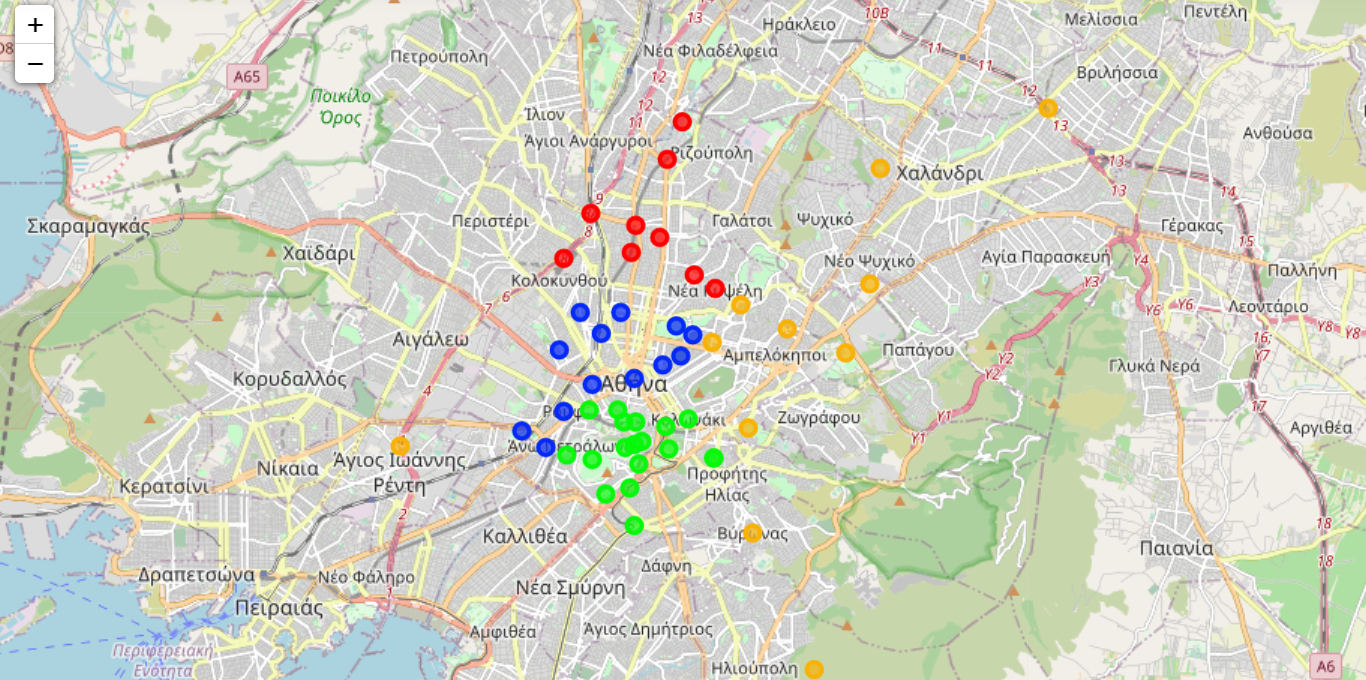

In [98]:
Image(filename=r"C:\Users\kalyv\Desktop\athens_clusters.PNG")